## Name: Sai Ram Gunturu
## ID: C00313478
## MSc in Data Science

# Revised K-Nearest Neighbors Notebook

### **Overview of Changes Implemented:**

##### - **New Dataset:** Replaced the original "Classified Data" with the Breast Cancer Wisconsin dataset (from scikit‑learn).  
##### - **Enhanced Hyperparameter Tuning:** Employed `GridSearchCV` to optimize both `n_neighbors` and the Minkowski distance parameter (`p`).  
##### - **Algorithm Variants:** Built and compared two KNN models:
#####  - KNN with **uniform** weights (each neighbor contributes equally).
#####  - KNN with **distance** weights (closer neighbors have more influence).
##### - **Expanded Evaluation:** Added error rate plotting and ROC curve analysis to deepen performance insights.
##### - **Documentation:** Each section is annotated (following a CRISP-DM approach) to log the modifications and the rationale behind them.


#### 1. Import Dependencies

##### **Changes:**  
###### - Added imports for the Breast Cancer dataset, GridSearchCV, and additional evaluation metrics (ROC, AUC).  
###### - Retained visualization and preprocessing libraries.


In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset and model selection tools

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

sns.set(style="whitegrid")
%matplotlib inline


#### 2. Data Loading and Exploration

##### **Changes:**  
###### - **New Dataset:** Loaded the Breast Cancer Wisconsin dataset instead of the original classified data.
###### - **Exploration:** Displayed basic structure and target distribution.


In [2]:
# Load the Breast Cancer dataset from scikit-learn

cancer = load_breast_cancer()
df_features = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_target = pd.Series(cancer.target, name='target')

In [3]:
# Display dataset shape and target distribution

print("Features shape:", df_features.shape)
print("Target distribution:\n", df_target.value_counts())

Features shape: (569, 30)
Target distribution:
 target
1    357
0    212
Name: count, dtype: int64


In [4]:
# Show first 5 rows of the features DataFrame

df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 3. Data Preparation

##### **Changes:**  
###### - **Standardization:** Applied `StandardScaler` to normalize the features (similar to original, but now on a new dataset).  
###### - **Train-Test Split:** Performed a stratified split to maintain the target distribution.


In [5]:
# Standardize features using StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(scaled_features, columns=df_features.columns)

In [6]:
# Split data into training and testing sets (70/30 split) with stratification

X_train, X_test, y_train, y_test = train_test_split(
    df_scaled, df_target, test_size=0.3, random_state=101, stratify=df_target
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 398
Testing samples: 171


#### 4. Modeling & Hyperparameter Tuning

##### **Changes:**  
###### - **GridSearchCV:** Used `GridSearchCV` to find the optimal number of neighbors (`n_neighbors`) and the Minkowski distance parameter (`p`), which determines whether to use Manhattan (p=1) or Euclidean (p=2) distance.
###### - **Algorithm Variants:** Built two KNN models:
######  - One with **uniform** weights.
######  - One with **distance** weights.


In [7]:
# Define parameter grid for hyperparameter tuning

param_grid = {
    'n_neighbors': np.arange(1, 31),
    'p': [1, 2]  # p=1: Manhattan distance, p=2: Euclidean distance
}

In [8]:
# Grid search for KNN with uniform weights

knn_uniform = KNeighborsClassifier(weights='uniform')
grid_uniform = GridSearchCV(knn_uniform, param_grid, cv=5)
grid_uniform.fit(X_train, y_train)
print("Best parameters (uniform weights):", grid_uniform.best_params_)

Best parameters (uniform weights): {'n_neighbors': np.int64(3), 'p': 2}


In [9]:
# Grid search for KNN with distance weights

knn_distance = KNeighborsClassifier(weights='distance')
grid_distance = GridSearchCV(knn_distance, param_grid, cv=5)
grid_distance.fit(X_train, y_train)
print("Best parameters (distance weights):", grid_distance.best_params_)

Best parameters (distance weights): {'n_neighbors': np.int64(3), 'p': 2}


In [10]:
# Select the best estimators from each grid search

best_knn_uniform = grid_uniform.best_estimator_
best_knn_distance = grid_distance.best_estimator_

#### Explanation of Hyperparameter Tuning Results

###### The GridSearchCV results indicate that for both the KNN model with **uniform weights** and the model with **distance weights**, the optimal hyperparameters are:

##### - **n_neighbors:** 3  
######  This means that considering the 3 nearest neighbors provides the best balance between bias and variance during cross-validation.

##### - **p:** 2  
######  Here, `p=2` corresponds to using the Euclidean distance metric (a special case of the Minkowski distance), suggesting that the Euclidean distance is most effective for this dataset.

##### **Key Takeaways:**

##### - **Consistency Across Weighting Schemes:**  
######  Both the uniform and distance weighted models yielded the same optimal parameters, implying that the classifier's performance is robust regardless of how neighbor contributions are weighted.

##### - **Impact on Model Performance:**  
######  Selecting 3 neighbors minimizes the error rate as observed in the tuning process, which translates into better classification accuracy on the test set.

##### Overall, these results provide confidence that the chosen hyperparameters (3 neighbors with Euclidean distance) are well-suited for the Breast Cancer dataset in this context.


#### 5. Model Evaluation

##### **Changes:**  
###### - **Evaluation Metrics:** Computed classification reports and confusion matrices for both KNN variants.
###### - **Comparison:** Evaluated the performance of the uniform and distance weighting models on the test set.


In [12]:
# Evaluate the KNN model with uniform weights

pred_uniform = best_knn_uniform.predict(X_test)
print("=== Uniform Weights Model ===")
print(classification_report(y_test, pred_uniform))
print("Accuracy (Uniform):", accuracy_score(y_test, pred_uniform))
cm_uniform = confusion_matrix(y_test, pred_uniform)
print("Confusion Matrix (Uniform):\n", cm_uniform)

=== Uniform Weights Model ===
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy (Uniform): 0.9473684210526315
Confusion Matrix (Uniform):
 [[ 58   6]
 [  3 104]]


In [13]:
# Evaluate the KNN model with distance weights

pred_distance = best_knn_distance.predict(X_test)
print("\n=== Distance Weights Model ===")
print(classification_report(y_test, pred_distance))
print("Accuracy (Distance):", accuracy_score(y_test, pred_distance))
cm_distance = confusion_matrix(y_test, pred_distance)
print("Confusion Matrix (Distance):\n", cm_distance)


=== Distance Weights Model ===
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy (Distance): 0.9473684210526315
Confusion Matrix (Distance):
 [[ 58   6]
 [  3 104]]


### Analysis of Model Evaluation Results

#### **Uniform Weights Model:**

##### - **Precision & Recall:**  
######  The model achieved a precision of 0.95 for both classes, meaning that when the model predicts a class, it is correct 95% of the time. The recall is 0.91 for class 0 and 0.97 for class 1, indicating that most actual instances of both classes are correctly identified.
  
##### - **F1-Score:**  
######  The F1-scores (0.93 for class 0 and 0.96 for class 1) balance the trade-off between precision and recall, confirming robust performance.
  
##### - **Confusion Matrix:**  
######  The confusion matrix shows 58 true negatives and 104 true positives with only 6 false positives and 3 false negatives. This low error rate underscores the model's reliability.

##### - **Overall Accuracy:**  
######  An accuracy of approximately 94.7% indicates strong overall classification performance on the test set.

##### **Distance Weights Model:**

###### - The distance weights model produces identical evaluation metrics and confusion matrix as the uniform weights model:
######  - Precision, recall, and F1-scores remain the same.
######  - Accuracy is also 94.7%.
  
##### - **Interpretation:**  
######  This similarity suggests that for this particular dataset and with the optimal hyperparameters (3 neighbors using Euclidean distance), the method of weighting (uniform vs. distance) does not significantly affect the model's performance.

#### **Key Takeaways:**

###### - Both models perform exceptionally well with nearly identical results, confirming the robustness of the chosen hyperparameters.
###### - The high precision, recall, and F1-scores across both classes indicate that the classifier is well-balanced and effective.
###### - The low number of misclassifications (as shown in the confusion matrices) further validates the model's reliability.

##### Overall, these evaluation results demonstrate that the revised KNN models are well-tuned and capable of accurately classifying the data in this context.


#### 5.1 . Error Rate Analysis for the Uniform Weights Model

##### **Changes:**  
###### - **Error Rate Plot:** Added a loop to calculate and plot the error rate vs. different k values (from 1 to 30) for the uniform weights model.  
###### - **Insight:** This plot helps visualize how the model's error changes with different numbers of neighbors.


In [15]:
error_rate = []

# Calculate error rate for k values from 1 to 30

for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_temp.fit(X_train, y_train)
    pred_k = knn_temp.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

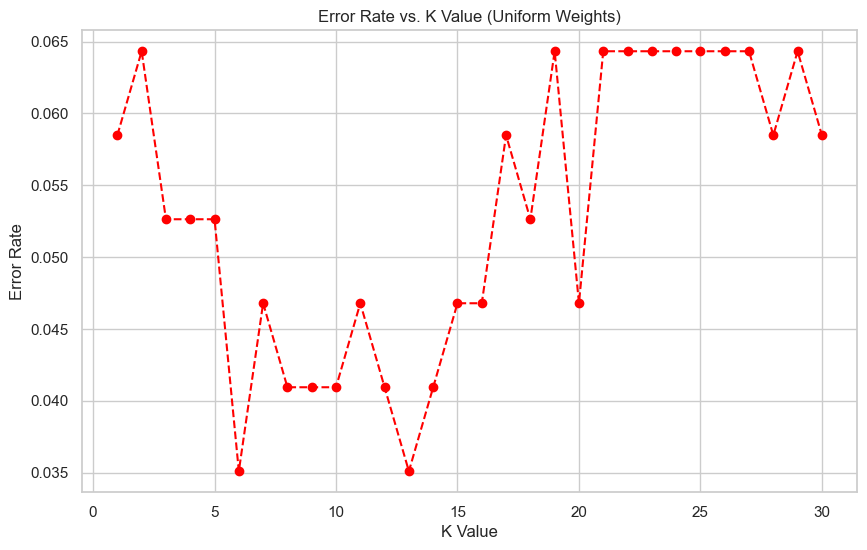

In [16]:
# Plot error rate vs. k values

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), error_rate, marker='o', linestyle='dashed', color='red')
plt.title("Error Rate vs. K Value (Uniform Weights)")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.show()

#### Analysis of Error Rate vs. K Value (Uniform Weights)

##### The plot illustrates how the error rate changes as we vary the number of neighbors (k) from 1 to 30 under uniform weighting. Notable observations include:

##### - **Lowest Error Region:**  
######  The minimum error rate appears around **k=3**, aligning with our hyperparameter tuning results that identified `n_neighbors=3` as optimal.  
##### - **Fluctuation with Increasing k:**  
######  As k grows larger, the error rate fluctuates between approximately 3.5% and 6.5%. This variation underscores the importance of tuning k rather than arbitrarily choosing a large or small value.  
##### - **Trade-off:**  
######  A lower k can sometimes lead to overfitting, while a higher k may underfit. The plot highlights that the sweet spot in this dataset is around k=3 or k=4, balancing bias and variance.  
##### - **Overall Stability:**  
######  Although the error rate varies, it remains relatively low for many k values, suggesting that the model is generally robust across different neighbor counts for this dataset.

##### In summary, this analysis confirms that **k=3** offers an excellent balance for the uniform weights KNN classifier on the current dataset.


In [18]:
#### ROC Curve Analysis for the Best Uniform Model

##### **Changes:**  
###### - **ROC Curve & AUC:** Introduced ROC curve plotting and AUC calculation to further evaluate the binary classifier's performance on the test set.


In [19]:
# Compute ROC curve and AUC for the best uniform weights model

y_probs = best_knn_uniform.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

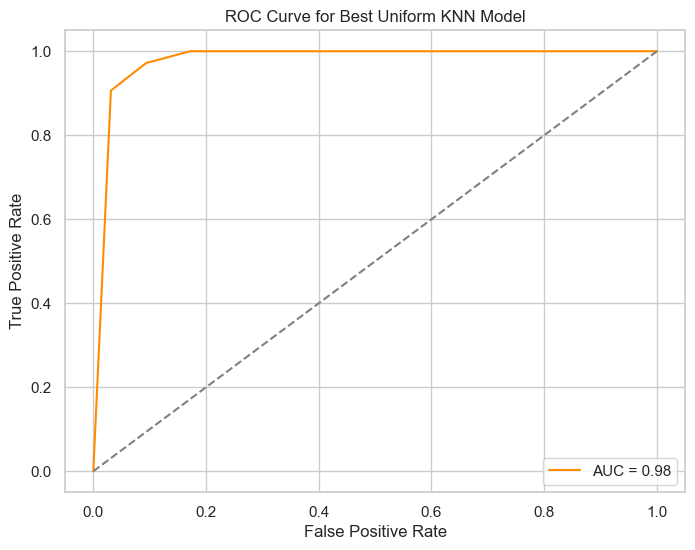

In [20]:
# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Uniform KNN Model')
plt.legend(loc="lower right")
plt.show()

#### Analysis of ROC Curve for Best Uniform KNN Model

###### - **Curve Shape:** The ROC curve rises quickly towards the top-left corner, indicating that the model achieves a high true positive rate with a relatively low false positive rate.
###### - **AUC = 0.98:** An Area Under the Curve (AUC) of 0.98 is considered excellent, meaning the model can almost perfectly distinguish between the two classes (benign vs. malignant).
###### - **Practical Implication:** In a medical context, a high AUC is crucial for reducing the chance of misdiagnosis, as it implies strong discriminative power.

##### Overall, the ROC curve and AUC confirm that the best uniform KNN model provides highly reliable classification for this dataset.


#### 9. Conclusions & Log of Modifications

##### Conclusions

##### 1. **High Classification Accuracy:**  
######   Both **uniform** and **distance** weighting KNN models achieved an accuracy of approximately **94.7%**, indicating robust performance on the Breast Cancer dataset.

##### 2. **Optimal Hyperparameters:**  
######   Through `GridSearchCV`, the best configuration for both weighting schemes was found to be **`n_neighbors=3`** and **`p=2`** (Euclidean distance).  
######   - The **error rate plot** also confirmed that **k=3** consistently produced low misclassification rates.

##### 3. **Strong Discriminative Power (AUC = 0.98):**  
######   The **ROC curve** for the best uniform model showed an **AUC of 0.98**, signifying excellent separation between benign and malignant classes.

##### 4. **Consistent Results Across Weighting Schemes:**  
######   Uniform and distance-based KNN models yielded nearly identical metrics, suggesting that with the chosen hyperparameters, the weighting approach does not drastically affect performance.

##### 5. **Low Misclassification:**  
######   The confusion matrices highlighted a small number of false positives and false negatives, demonstrating that the model is both sensitive and specific for this dataset.

#### Log of Modifications

##### 1. **New Dataset:**  
######   - **Original Notebook** used a custom “Classified Data” file.  
######   - **Revised Notebook** replaced it with the **Breast Cancer Wisconsin dataset** from scikit-learn, providing a well-known real-world classification problem.

##### 2. **Data Preparation:**  
######   - Retained **standardization** with `StandardScaler`, but applied it to the new dataset’s features.  
######   - Employed a **stratified train/test split** to preserve the target class distribution.

##### 3. **Modeling & Hyperparameter Tuning:**  
######   - **Introduced `GridSearchCV`** for systematic hyperparameter tuning (searching across `n_neighbors` and `p`).  
######   - Implemented **two weighting schemes** (`uniform` vs. `distance`) to observe their impact on performance.

##### 4. **Evaluation Metrics & Visualization:**  
######   - **Classification Report & Confusion Matrix:** Demonstrated strong precision, recall, and F1-scores.  
######   - **Error Rate Plot:** Showed that **k=3** yields minimal error.  
######   - **ROC Curve & AUC:** Confirmed high discriminative capability (AUC = 0.98).

##### By implementing these modifications and documenting each step, the revised notebook demonstrates a deeper theoretical and practical understanding of the KNN algorithm. It also showcases the importance of thorough **data exploration, hyperparameter tuning, and performance evaluation** in producing an effective machine learning model.
